# Lineáris algebra

A lineáris algebra a sokváltozós lineáris egyenletrendszerek megoldásával, illetve megoldhatóságának vizsgálatával foglalkozik. 
A lineáris algebra gyakorlati jelentősége abban mutatkozik meg, hogy számos bonyolult matematikai probléma numerikus megoldása sok esetben egy sokismeretlenes (esetenként igen sok, akár több millió) lineáris egyenletrendszerre vezet. Az alábbiakban a `numpy` csomag lineáris algebrai rutinjaival fogunk megismerkedni. Először a `matrix` típust vizsgáljuk meg, melynek segítségével egyszerű vektor-mátrix műveletek tömören fogalmazhatóak meg. Ezután a `solve` lineáris egyenletrendszereket megoldó függvény használatát sajátítjuk el, végül az `eig` sajátérték-, illetve sajátvektor-kereső rutinnal ismerkedünk meg. A végén ritka mátrixok használatáról lesz még szó.

In [1]:
# A szokásos import
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Mátrixok és mátrix-vektor műveletek

A korábbiakban rendszeresen használtuk a `numpy` csomag `array` változóit. Ezek sok szempontból hasznosnak bizonyultak, de alapvetően táblázatként működtek, és nem a lineáris algebrában megszokott mátrixként. Ennek a legszembetűnőbb megnyilvánulása az, hogy a rájuk értelmezett műveletek szigorúan elemenként értendőek voltak. Azaz a `*` elemenkénti szorzást és nem mátrixszorzást jelent. Például az alább definiált `A` és `B` tömbök

In [2]:
# két minta array
A=array([[1,2],
         [3,4]])

B=array([[2,2],
         [2,2]])


egymással összeszorozva egy olyan `array` -t adnak végeredményül, amelynek elemei az `A` és a `B` elemeinek szorzata: 
$$ (A*B)_{ij}=A_{ij}*B_{ij} $$

In [3]:
A*B

array([[2, 4],
       [6, 8]])

Ez a művelet természetesen nem érzékeny a műveleti sorrendre, azaz `A*B=B*A`:

In [4]:
B*A

array([[2, 4],
       [6, 8]])

A `numpy` rendelkezik egy `matrix` típussal is, ami sok szempontból hasonlóan viselkedik, mint az `array`, de bizonyos műveletek, például a \* is a lineáris algebrában megszokott módon vannak definiálva. Azaz itt a \*-jel az alábbiakat jelenti:
$$ (A*B)_{ij}=\sum_l A_{il}B_{lj} $$

A `matrix()`-függvény  `array` vagy `list` típusú változókból `matrix` típusú változókat csinál:

In [5]:
# Így definiálunk mátrixokat
Am=matrix(A)
Bm=matrix(B)

Figyeljük meg, hogy az `Am` és `Bm` változókra miként hat a * művelet:

In [6]:
Am*Bm

matrix([[ 6,  6],
        [14, 14]])

In [7]:
Bm*Am

matrix([[ 8, 12],
        [ 8, 12]])

A szorzás eredménye tehát, ahogy vártuk, függ a műveleti sorrendtől!

Nézzünk meg néhány hasznos lineáris algebrai mátrixműveletet:

In [8]:
Am.T  # Ez az Am mátrix transzponáltja

matrix([[1, 3],
        [2, 4]])

In [9]:
Am+1.0j*Bm #Ez egy komplex mátrix

matrix([[ 1.+2.j,  2.+2.j],
        [ 3.+2.j,  4.+2.j]])

In [10]:
(Am+1.0j*Bm).H  # Ez a komplex  mátrix adjungáltja, azaz a transzponált konjugáltja

matrix([[ 1.-2.j,  3.-2.j],
        [ 2.-2.j,  4.-2.j]])

In [11]:
trace(Am) # A mátrix nyoma, (vagy spur-ja) azaz a diagonális elemek összege

5

In [12]:
trace(A) # A trace ugyan úgy működik array-ekre

5

In [13]:
det(Am) # A mátrix determinánsa

-2.0000000000000004

In [14]:
det(A) # A determináns is alkalmazható array-ekre

-2.0000000000000004

In [15]:
inv(Am) # A mátrix inverze.. ugyebár ez nem feltétlenül létezik

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [16]:
inv(A) # Ez is megy array -ekre

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [17]:
inv(Am)*Am # Ennek egységnek kell lennie

matrix([[  1.00000000e+00,   0.00000000e+00],
        [  2.22044605e-16,   1.00000000e+00]])

## Lineáris egyenletrendszerek

Az egyik gyakran előforduló lineáris algebrai feladat az egyenletrendszerek megoldása. Például keressük azt az $x$ vektort, amely teljesíti a

$$ \mathbf{A}x=b$$

egyenletet, ahol $\mathbf{A}$ egy ismert mátrix, és $b$ egy ismert vektor. A `numpy` csomag az ilyen formában megadott egyenletrendszer megoldására a `solve` függvényt kínálja. 

**Figyelem**: ez a függvény nem keverendő össze a `sympy` csomag azonos nevű függvényével, amely tetszőleges algebrai egyenletrendszerre kínál analitikus megoldást. A `numpy` modul `solve` függvénye szigorúan csak numerikus lineáris algebrai feladatok megoldására alkalmas!

Vizsgáljunk meg egy példát! Keressük meg azt a síkbeli vektort, amit ha $\varphi=30^\circ$-al az óra járásával megegyező irányban elforgatunk, akkor az $y$ irányú egységvektort kapjuk! 
Azaz 

$$A=\begin{pmatrix}
\cos(\varphi) & -\sin(\varphi)\\ 
\sin(\varphi) & \cos(\varphi)
\end{pmatrix}$$ valamint
$$b=\begin{pmatrix}
0 \\ 
1    
\end{pmatrix}$$

In [18]:
# az ismert mennyiségek definiálása:
phi=pi/6;
#Ez az A mátrix
A=matrix([[cos(phi), -sin(phi)],
         [sin(phi),  cos(phi)]])
#Ez pedig a b oszlopvektor, figyeljünk a zárójelezésre!!!
b=matrix([[0],
          [1]])

In [19]:
x=solve(A,b)

In [20]:
x

matrix([[ 0.5      ],
        [ 0.8660254]])

## Sajátérték-probléma

A másik sokszor felmerülő lineáris algebrai problémakör egy mátrix sajátértékeinek és sajátvektorainak meghatározása. Legyen $A$ egy ismert mátrix, és keressük tehát azon $x$ vektorokat, illetve azon $\lambda$ számokat, melyek teljesítik az alábbi feltételt.

$$ \mathbf{M}x=\lambda x.$$

Ilyen jellegű problémákat az `eig` rutin segítségével tudunk megoldani. Lássunk erre is egy példát!
Legyen $M$ egy 10x10-es mátrix, melynek mindkét első mellékátlója -1, a többi elem pedig nulla!

In [21]:
M=matrix(zeros((10,10))) # Így gyártunk egy 10x10-es üres mátrixot.
for i in range(9):#A mellékátlók 1-el rövidebbek mint a mátrix mérete!
    M[i,i+1]=-1.0 #A mellékátlók feltöltése -1 -el
    M[i+1,i]=-1.0 


In [22]:
M # nézzük meg a mátrixot

matrix([[ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

A sajátérték-probléma megoldása:

In [23]:
ertek,vektor=eig(M)

Most az `ertek` valtozó tartalmazza a sajátértékeket, illetve a `vektor` a sajátvektorokat.

In [24]:
ertek

array([-1.91898595, -1.68250707, -1.30972147, -0.83083003, -0.28462968,
        0.28462968,  1.91898595,  1.68250707,  1.30972147,  0.83083003])

In [25]:
vektor

matrix([[-0.12013117,  0.23053002,  0.3222527 ,  0.38786839, -0.42206128,
         -0.42206128, -0.12013117, -0.23053002, -0.3222527 ,  0.38786839],
        [-0.23053002,  0.38786839,  0.42206128,  0.3222527 , -0.12013117,
          0.12013117,  0.23053002,  0.38786839,  0.42206128, -0.3222527 ],
        [-0.3222527 ,  0.42206128,  0.23053002, -0.12013117,  0.38786839,
          0.38786839, -0.3222527 , -0.42206128, -0.23053002, -0.12013117],
        [-0.38786839,  0.3222527 , -0.12013117, -0.42206128,  0.23053002,
         -0.23053002,  0.38786839,  0.3222527 , -0.12013117,  0.42206128],
        [-0.42206128,  0.12013117, -0.38786839, -0.23053002, -0.3222527 ,
         -0.3222527 , -0.42206128, -0.12013117,  0.38786839, -0.23053002],
        [-0.42206128, -0.12013117, -0.38786839,  0.23053002, -0.3222527 ,
          0.3222527 ,  0.42206128, -0.12013117, -0.38786839, -0.23053002],
        [-0.38786839, -0.3222527 , -0.12013117,  0.42206128,  0.23053002,
          0.23053002, -0.3878683

Az $i$-edik sajátvektort a `vektor` változó `i`-edik oszlopa, `vektor[:,i]` tartalmazza.

Ez a sajátvektor az $i$-edik, `ertek[i]` sajátértékhez tartozó megoldása az $Mx=\lambda x$ sajátérték-problémának.

Ellenőrizzük ezt le:

In [26]:
#ez tehát a nullvektor kell hogy legyen:
M*vektor[:,3]-vektor[:,3]*ertek[3]

matrix([[ -1.66533454e-16],
        [ -8.32667268e-16],
        [  8.32667268e-17],
        [  1.11022302e-16],
        [  3.60822483e-16],
        [  3.88578059e-16],
        [  2.77555756e-16],
        [  5.55111512e-17],
        [ -2.77555756e-16],
        [ -1.11022302e-16]])

Jelenítsük meg a két legkisebb sajátértékhez tartozó sajátfüggvényt!

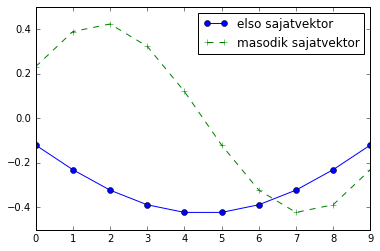

In [27]:
plot(vektor[:,0],'o-',label='elso sajatvektor')
plot(vektor[:,1],'+--',label='masodik sajatvektor')
legend()

Vajon miért néznek így ki ezek a sajátfüggvények ? 

## Ritka mátrixok

Egy $N\times N$-es numpy arraynek $N^2$ eleme van, amelyből mindet el kell tárolnunk még akkor is, ha az adott helyen esetleg 0-s áll. A fizikában, illetve a mindennapi életből vett példákban is nagyon gyakori, hogy egy $N\times N$-es mátrixnak nagyságrendileg csak $N$ db 0-tól különböző eleme van. Az ilyen mátrixokat ritka (sparse) mátrixoknak nevezzük, szemben az $N^2$ elemet tartalmazó sűrű (dense) mátrixokkal. Tárolás szempontjából mindenképpen sokkal kisebb helyet foglalnak, emellett a ritka mátrixok használata gyorsabb műveleteket, illetve algoritmusokat tesz lehetővé, így a futásidő szempontjából sem elhanyagolható a jelentőségük.

Pythonban a *scipy* modul *sparse* almoduljában találunk többféle sparse osztályt is, melyek különbözőképpen reprezentálják azt a mátrixot, amelyet tárolni kívánunk.

Három fontos dologra kell felhívunk a figyelmet:
* scipy sparse mátrixokra a \*-jel mátrixszorzást, és nem elemenkénti szorzatot jelent (mint a matrix-nál),
* a numpy rutinjai **nem** működnek sparse típusú mátrixokon (ez fordítva is igaz),
* érdemes a `%pylab inline` helyett np-ként importáni a numpy-t, illetve külön a scipy-t, nehogy összekeveredjenek a különböző osztályokra meghívható, de ugyanolyan nevű függvények.

In [28]:
from scipy import sparse as sp
import numpy as np

### Alosztályok

*Nagyon jó angol nyelvű összefoglaló található a http://www.scipy-lectures.org/advanced/scipy_sparse/storage_schemes.html honlapon!*

Készítsünk egy arrayből sparse mátrixot!

In [29]:
sp.csr_matrix(np.array([[0,0,1],[1,0,0],[0,0,0]]))

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

Látható, hogy az elkészült sparse mátrix is 3x3-as, de csak 2 elem, a 2 db 1-es van benne eltárolva.

A használt sparse alosztály az egyik leggyakoribb, ún. compressed sparse row (**csr**) formátum. Ebben három numpy array tárolja az adatokat, az első a mátrixelemeket, a második az oszlopindexeket tartalmazza, a harmadik pedig megmondja, hányadik helyen kezdődik az előző két vektorban a mátrix egy új sora.

![csr_matrix](https://www.karlrupp.net/wp-content/uploads/2016/02/csr_storage_sparse_marix.png)

Készülhet arrayből, mint az előbb, de indíthatjuk üresen:

In [30]:
A=sp.csr_matrix((3,4))
A

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

Elemeit a numpy-ban megszokott módon érhetjük el:

In [31]:
A[0,1]=1
A[2,2]=1

/opt/conda/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Láthatjuk, hogy figyelmeztetést kaptunk: egy ilyen típusú mátrixba új adatot beírni költséges, hiszen be kell szúrni az adat-, illetve az oszlopindex-mátrixokba egy-egy elemet, illetve át kell írni egy bizonyos ponttól kezdve az összes sorkezdést jelző elemet a harmadik tömbben!

Ebből is észrevehetjük, hogy különböző műveletekre különböző sparse osztályok lesznek jók, hiszen ha egy fix mátrixot olvasunk be, amit nem módosítunk a későbbiekben, akkor a csr adattípusnak ez a hátránya nem jön elő.

A csr mátrixon használhatjuk a numpy-ban megszokott maszkolási és szeletelési módokat:

In [32]:
A[A>0]

matrix([[ 1.,  1.]])

In [33]:
A[0:2,0:2]

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

Mindegyik sparse osztály az ún. `spmatrix` osztály alosztálya, így a következő műveletek minden sparse mátrix esetén megívhatók:

In [34]:
A.T # transzponált

<4x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Column format>

In [35]:
A.size # nem 0 elemek száma

2

In [36]:
A.shape # dimenziók

(3, 4)

In [37]:
A.todense() # átalakítás numpy arrayjé!

matrix([[ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.]])

Nézzünk meg néhány további sparse alosztályt!

Hasznos lehet a **coo**, az ún. koordinátaformátum. Itt (i,j,érték) tripletekben vannak a nem 0 elemek eltárolva. Mivel gyakran ilyen lista formájában kapunk adatot, ez a formátum gyors beolvasást tesz lehetővé. Sajnos indexelni, szeletelni viszont nem lehet:

In [38]:
A.tocoo()[0:2,0:2]

TypeError: 'coo_matrix' object is not subscriptable

Egy példa sor-, illetve oszlopindexekből történő konstrukcióra:

In [39]:
rows=[0,1,2,3,4,5,6]
cols=[4,2,3,1,0,6,5]
data=[1,2,3,4,5,6,7]

sp.coo_matrix((data,(rows,cols))).todense()

matrix([[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 3, 0, 0, 0],
        [0, 4, 0, 0, 0, 0, 0],
        [5, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 6],
        [0, 0, 0, 0, 0, 7, 0]])

A `coo_matrix()`-nak megadhatunk duplán is elemeket, ekkor viszont az ugyanazon a helyen levő értékeket össze fogja adni.

In [40]:
rows=[0,1,2,3,4,5,6,6]
cols=[4,2,3,1,0,6,5,5]
data=[1,2,3,4,5,6,7,5]

sp.coo_matrix((data,(rows,cols))).todense()

matrix([[ 0,  0,  0,  0,  1,  0,  0],
        [ 0,  0,  2,  0,  0,  0,  0],
        [ 0,  0,  0,  3,  0,  0,  0],
        [ 0,  4,  0,  0,  0,  0,  0],
        [ 5,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  6],
        [ 0,  0,  0,  0,  0, 12,  0]])

Sokszor például csak a főátló, vagy a főátló melletti mellékátlók tartalmazzák csak a nem 0 elemeket. Ezeknek a tárolására szolgál a **dia** alosztály.

In [41]:
D=sp.dia_matrix(np.diag(np.random.randint(1,4,(1,20))[0,:]))

Itt a nem 0 elemeket tartalmazó átlók számát, az átlók elemeit, illetve az átlók helyzetét tárolja el az osztály. A helyzetet a főátlótól mérjük, melyhez a 0 tartozik, a főátló fölött eggyel a +1, alatta a -1 stb. helyzetű átlók jönnek.

Ebben a jelölésben egy egységmátrix így készül:

In [42]:
sp.dia_matrix((np.ones((10,)),0),shape=(10,10)).todense()

matrix([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

Egy csupa 1-eket tartalmazó felső háromszögmátrix pedig:

In [43]:
sp.dia_matrix((np.ones((10,10)),range(0,10)),shape=(10,10)).todense()

matrix([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

Érdemes még megemlíteni a **lil** osztályt, amely egy hosszú listában tárolja a sorok listába rendezett nem 0 elemeit, illetve egy másik sorok számányi hosszú listában ezen nem 0 elemek oszlopindexeit. A **csc** pedig a **csr** oszlopalapú párja.

**Összefoglalásul** talán annyit érdemes megjegyezni hogy ritka mátrixokat általában kényelmes a **coo** illetve a **dia** alosztályban *létrehozni*, de ha *műveleteket* akarunk rajtuk végrehjtani akkor a **csr** (vagy **csc**) osztályba érdemes őket átkonvertálni!

### Sparse függvények

Hasonló néven és szintaxissal hívhatók, mint a numpyban. A legfontosabbak elérési útvonalai és nevei:

In [44]:
from scipy.sparse.linalg import spsolve,eigs

Ha egy lineáris egyenletrendszerben szereplő mátrix ritka, akkor az egyenlet rendszert a `scipy.sparse.linag`  modul `spsolve` függvénye segítségével igen gyorsan (a hagyományos `solve`-nál jóval gyorsabban) tudjuk megoldani.
Az `spsolve` szintaxisa alapvetően a `solve` szintaxisát utánozza. Lássunk erre egy egyszerű példát:

In [45]:
K=sp.dia_matrix((ones(10),1),shape=(10,10));K=K+K.T; # ez egy sparse matrix
K.todense()

matrix([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [46]:
b=rand(10); # ez egy vektor

Oldjuk meg a $\mathbf{K}x=b$ egyenletrendszert most az `spsolve`-al

In [47]:
spsolve(K,b)

array([-0.28878578,  0.53054261,  0.47671641, -0.13474389, -0.30382861,
        0.66185352,  0.37281731, -0.61544588,  0.40815713,  1.41928137])

A másik gyakran előforduló lineáris algebrai probléma melyben a ritka mátrixok használata előnyt jelent a sajátérték probléma. Ritka mátrixok sajátértékeit a `scipy.sparse.linalg` modul `eigs` függvénye segítségével találhatjuk meg.

Külön érdemes figyelni arra, hogy az `eigs` csak az első néhány sajátértéket, illetve sajátvektort adja meg. Azt, hogy melyik ez az "első néhány", különböző, a sajátértékekre vontakozó kritériumok alapján dönthetjük el.

Választhatjuk például a legnagyobb abszolút értékű sajátértékekhez tartozó sajátvektort (ekkor amúgy a híres magyar matematikusról elnevezett [Lánczos-algoritmussal](https://en.wikipedia.org/wiki/Lanczos_algorithm) iterál a függvény a megfelelő vektorhoz):

In [48]:
A=sp.coo_matrix(np.array([[0,0,2,1],[3,1,2,0],[0,2,0,1],[6,0,3,0]],dtype="float")).todense()

w,v=eigs(A,k=1,which="LM") # LM = largest magnitude
print(w,"\n",v.T)

[ 4.4632309+0.j] 
 [[-0.32849912+0.j -0.50598365+0.j -0.38342042+0.j -0.69932658+0.j]]


Vagy a két legkisebb valós résszel rendelkező sajátértékhez tartozó sajátvektort.

In [49]:
w,v=eigs(A,k=2,which="SR") # SR = smallest real part
print(w,"\n",v.T)

[-2.09686914+1.06013948j -2.09686914-1.06013948j] 
 [[ 0.26042298-0.05117194j -0.03241182-0.31098373j -0.17560382+0.54111535j
  -0.14061587-0.69884515j]
 [ 0.26042298+0.05117194j -0.03241182+0.31098373j -0.17560382-0.54111535j
  -0.14061587+0.69884515j]]


### Kron

Gyakran találkozhatunk olyan mátrixokkal, amelyeket blokkok megfelelő súllyal vett ismétléséből rakhatunk össze. Ilyenkor jöhet jól az ún. [Kronecker-szorzat](https://en.wikipedia.org/wiki/Kronecker_product) a konstrukcióra. A numpy és a scipy is tartalmaz külön `kron` függvényt, az alábbiakban a scipy `kron`-jának működését mutatjuk be.

In [50]:
from scipy.sparse import kron

Két vektor Kronecker-szorzata a vektoszámításról ismert diadikus szorzat lesz:

In [51]:
a=np.array([1,2,5,7])
b=np.array([[2],[4],[2],[4]])
kron(a,b).todense()

matrix([[ 2,  4, 10, 14],
        [ 4,  8, 20, 28],
        [ 2,  4, 10, 14],
        [ 4,  8, 20, 28]], dtype=int64)

Egy vektor és egy mátrix Kronekker-szorzata az alábbiak szerint alakul:

In [52]:
a=np.diag(np.array([1,2,3,4]))
b=np.array([[1,1],[1,1]])

In [53]:
kron(a,b).todense()

matrix([[1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 2, 0, 0, 0, 0],
        [0, 0, 2, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 3, 0, 0],
        [0, 0, 0, 0, 3, 3, 0, 0],
        [0, 0, 0, 0, 0, 0, 4, 4],
        [0, 0, 0, 0, 0, 0, 4, 4]], dtype=int64)

Végül két mátrix Kronekker-szorzatára egy példa:

In [54]:
kron(eye(3),np.array([[1,2],[3,4]])).todense()

matrix([[ 1.,  2.,  0.,  0.,  0.,  0.],
        [ 3.,  4.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2.,  0.,  0.],
        [ 0.,  0.,  3.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  2.],
        [ 0.,  0.,  0.,  0.,  3.,  4.]])

Figyelem a Kronekker-szorzat érzékeny a szorzó tényezők sorrendjére!

In [55]:
kron(np.array([[1,2],[3,4]]),eye(3)).todense()

matrix([[ 1.,  0.,  0.,  2.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  2.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  2.],
        [ 3.,  0.,  0.,  4.,  0.,  0.],
        [ 0.,  3.,  0.,  0.,  4.,  0.],
        [ 0.,  0.,  3.,  0.,  0.,  4.]])